# 4장 가장 훌륭한 예측선

### 1. 선형 회귀의 정의
- 선형 회귀(linear regression): 가장 훌륭한 예측선 - 독립적으로 변할 수 있는 값 x를 독립 변수, 이 독립 변수에 따라 종속적으로 변하는 y를 종속 변수라고 한다.(독립 변수 x를 사용해 종속 변수 y의 움직임을 예측하고 설명하는 작업)
- 단순 선형 회귀: 하나의 x 값만으로도 y 값을 설명
- 다중 선형 회귀: x 값이 여러 개 필요

### 2. 가장 훌륭한 예측선이란?
- y = ax + b (x=독립변수, y=종속변수) - x 값에 따라 y값은 반드시 달라짐 - 우리는 상수 a와 b값을 알아야 함

| 공부한 시간| 2시간 | 4시간 | 6시간 | 8시간 |
| ---- |---|---|---|---|
| 성적 | 81 점| 93 점 | 91 점 | 97점 |
| 예측 값| 83.6점 | 88.2점 | 92.8점 | 97.4점 |

### 3. 최소 제곱법
- 공식: a = (x - x평균) * (y - y평균)의 합 / (x - x평균)^2의 합
1. 공부한 시간(x) 평균: (2 + 4 + 6 + 8) / 4 = 5
2. 성적(y) 평균: (81 + 93 + 91 + 97) / 4 = 90.5
3. (2 - 5)(81 - 90.5) + (4 - 5)(93 - 90.5) + (6 - 5)(91 - 90.5) + (8 - 5)(97 - 90.5) / (2 - 5)^2 + (4 - 5)^2 + (6 - 5)^2 + (8 - 5)^2 = 2.3
4. a = 2.3 , b = 79/ 절편 b 구하기 - b = y의 평균 - (x의 평균 * 기울기 a) - b = 90.5 - (5 * 2.3) = 79 
5. 직선의 방정식 = y = 2.3x + 79

### 4. 파이썬 코딩으로 확인하는 최소 제곱

In [122]:
# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듬
import numpy as np

x = np.array([2,4,6,8])
y = np.array([81, 93, 91, 97])

In [123]:
# x, y 평균값 구하기
mx = np.mean(x)
my = np.mean(y)

In [124]:
# 최소 제곱근 공식 - 분모 값
divisor = sum([(i - mx)**2 for i in x])

In [125]:
# 최소 제곱근 공식 - 분자 값
def top(x, mx, y, my):
  d = 0
  for i in range(len(x)):
    d += (x[i] - mx) * (y[i] - my)
  return d

In [126]:
dividend = top(x, mx, y, my)

In [127]:
# 출력으로 확인
print('분모: ', divisor)
print('분자: ', dividend)

분모:  20.0
분자:  46.0


In [128]:
# 기울기 a, y 절편 구하기
a = dividend / divisor
b = my - (mx * a)

In [129]:
# 출력으로 확인
print('기울기 a = ', a)
print('y 절편 b = ', b)

기울기 a =  2.3
y 절편 b =  79.0


### 5. 평균 제곱 오차
- 다른 데이터는 입력 데이터가 무수히 많다. 그래서 사용하는 방법이 일단 그리고 조금씩 수정해 나가기 방식
- 평균 제곱 오차(Mean Square Error, MSE): 주어진 선의 오차를 평가하는 방법
- 공식: 오차 = (실제 값 - 예측 값)^2

### 6. 파이썬 코딩으로 확인하는 평균 제곱 오차

In [130]:
# 임의로 정한 기울기 a와 y 절편 b 값이 각각 3, 76
fake_a = 3
fake_b = 76

In [131]:
# 공부 시간 x와 성적 y 넘파이 배열
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [132]:
# y = ax + b에 가상의 a 값과 b 값을 대입한 결과 출력
def predict(x):
  return fake_a * x + fake_b

In [133]:
# 예측 값이 들어갈 빈 리스트
predict_result = []

# 모든 x 값을 한 번씩 대입
for i in range(len(x)):
  predict_result.append(predict(x[i]))
  print('공부시간=%.f, 실제점수=%.f, 예측점수=%.f ' % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=82 
공부시간=4, 실제점수=93, 예측점수=88 
공부시간=6, 실제점수=91, 예측점수=94 
공부시간=8, 실제점수=97, 예측점수=100 


In [134]:
# 평균 제곱 오차 함수를 각 y 값에 대입해 최종 값 구하는 함수
n = len(x)
def mse(y, y_pred):
  return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 값 출력
print('평균 제곱 오차: ' + str(mse(y, predict_result))) # y = 3x + 76 오차가 약 11.0이라는 것을 확인 -> 이 오차를 줄이면서 새로운 선을 긋는 것

평균 제곱 오차: 11.0


# 5장 선형 회귀 모델: 먼저 긋고 수정하기

### 1. 경사 하강법의 개요
- 경사 하강법은 오차의 변화에 따라 이차 함수 그래프를 만들고 적절한 학습률을 설정해 미분 값이 0인 지점을 구하는 것
- 기울기 0 지점 = 미분 값이 0인 지점
- 학습률(learning rate): 이동 거리를 정해줌

### 2. 파이썬 코딩으로 확인하는 선형 회귀

In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
# 공부한 시간 x와 성적 y 넘파이 배열
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

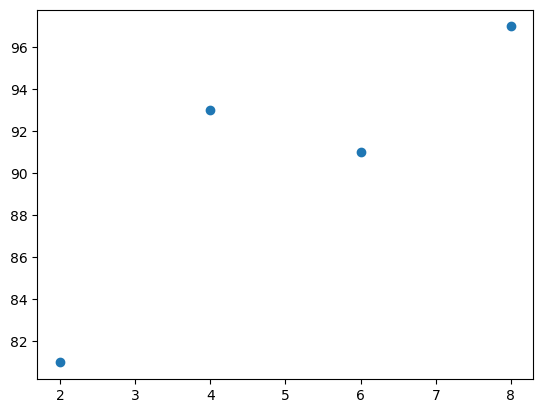

In [137]:
# 데이터이 분포를 그래프로 시각화
plt.scatter(x,y)
plt.show()

In [138]:
# 기울기 a값과 절편 b값 초기화
a = 0
b = 0

In [139]:
# 학습률, 반복 횟수 설정
lr = 0.03
epochs = 2001

In [140]:
# x 값의 총 개수
n = len(x)

In [141]:
# 경사 하강법 시작
for i in range(epochs): # 에포크 수만큼 반복
  y_pred = a * x + b # 예측 값 구하는 식
  error = y - y_pred # 실제 값 - 오차 값

  a_diff = (2/n) * sum(-x * (error)) # 오차 함수를 a로 편미분한 값
  b_diff = (2/n) * sum(-(error)) # 오차 함수를 b로 편미분한 값

  a = a - lr * a_diff # 학습률을 곱해 기존의 a값 업데이트
  b = b - lr * b_diff # 학습률을 곱해 기존의 b값 업데이트

  if i % 100 == 0: # 100번 반복될 때마다 현재의 a값, b값 출력
    print('epoch=%.f,  기울기=%.04f,   절편=%.04f' % (i, a, b))

epoch=0,  기울기=27.8400,   절편=5.4300
epoch=100,  기울기=7.0739,   절편=50.5117
epoch=200,  기울기=4.0960,   절편=68.2822
epoch=300,  기울기=2.9757,   절편=74.9678
epoch=400,  기울기=2.5542,   절편=77.4830
epoch=500,  기울기=2.3956,   절편=78.4293
epoch=600,  기울기=2.3360,   절편=78.7853
epoch=700,  기울기=2.3135,   절편=78.9192
epoch=800,  기울기=2.3051,   절편=78.9696
epoch=900,  기울기=2.3019,   절편=78.9886
epoch=1000,  기울기=2.3007,   절편=78.9957
epoch=1100,  기울기=2.3003,   절편=78.9984
epoch=1200,  기울기=2.3001,   절편=78.9994
epoch=1300,  기울기=2.3000,   절편=78.9998
epoch=1400,  기울기=2.3000,   절편=78.9999
epoch=1500,  기울기=2.3000,   절편=79.0000
epoch=1600,  기울기=2.3000,   절편=79.0000
epoch=1700,  기울기=2.3000,   절편=79.0000
epoch=1800,  기울기=2.3000,   절편=79.0000
epoch=1900,  기울기=2.3000,   절편=79.0000
epoch=2000,  기울기=2.3000,   절편=79.0000


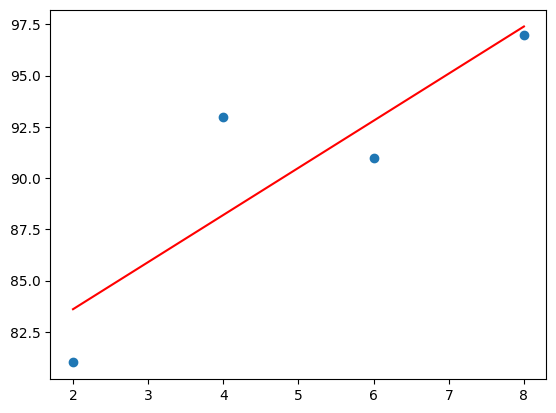

In [142]:
# 앞서 구한 최종 a 값 기울기, b 값 y절편에 대입해 그래프 그리기
y_pred = a * x + b

# 그래프 출력
plt.scatter(x,y)
plt.plot(x, y_pred, 'r')
plt.show()

### 3. 다중 선형 회귀의 개요
- 더 정확환 예측을 하려면 추가 정보를 입력해야 한다.

**y = a1*x1 + a2*x2 + b**
| 공부한 시간(x1)| 2시간 | 4시간 | 6시간 | 8시간 |
| ---- |---|---|---|---|
| 과외 수업 횟수(x2)| 0번 | 4번 | 2번 | 3번 |
| 성적(y) | 81 점| 93 점 | 91 점 | 97점 |

### 4. 파이썬 코딩으로 확인하는 다중 선형 회귀

In [143]:
import numpy as np
import matplotlib.pyplot as pt

In [144]:
# 공부 시간 x1과 과외 시간 x2 성적 y의 넘파이 배열
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97])

In [145]:
# 기울기 a의 값과 절편 b의 값을 초기화
a1 = 0
a2 = 0
b = 0

In [146]:
# 학습률, 반복 횟수 설정
lr = 0.01
epochs = 2001

In [147]:
# x 값 총 개수
n = len(x1)

In [148]:
# 경사 하강법 시작
for i in range(epochs): # 에포크 수만큼 반복
  y_pred = a1 * x1 + a2 * x2 + b # 예측 값 구하는 식
  error = y - y_pred # 실제 값 - 오차 값

  a1_diff = (2/n) * sum(-x1 * (error)) # 오차 함수를 a1로 편미분한 값
  a2_diff = (2/n) * sum(-x2 * (error)) # 오차 함수를 a2로 편미분한 값
  b_diff = (2/n) * sum(-(error)) # 오차 함수를 b로 편미분한 값

  a1 = a1 - lr * a1_diff # 학습률을 곱해 기존의 a1값 업데이트
  a2 = a2 - lr * a2_diff # 학습률을 곱해 기존의 a2값 업데이트
  b = b - lr * b_diff # 학습률을 곱해 기존의 b값 업데이트

  if i % 100 == 0: # 100번 반복될 때마다 현재의 a값, b값 출력
    print('epoch=%.f,  기울기1=%.04f, 기울기2=%.04f  절편=%.04f' % (i, a1, a2, b))

epoch=0,  기울기1=9.2800, 기울기2=4.2250  절편=1.8100
epoch=100,  기울기1=9.5110, 기울기2=5.0270  절편=22.9205
epoch=200,  기울기1=7.3238, 기울기2=4.2950  절편=37.8751
epoch=300,  기울기1=5.7381, 기울기2=3.7489  절편=48.7589
epoch=400,  기울기1=4.5844, 기울기2=3.3507  절편=56.6800
epoch=500,  기울기1=3.7447, 기울기2=3.0608  절편=62.4448
epoch=600,  기울기1=3.1337, 기울기2=2.8498  절편=66.6404
epoch=700,  기울기1=2.6890, 기울기2=2.6962  절편=69.6938
epoch=800,  기울기1=2.3653, 기울기2=2.5845  절편=71.9160
epoch=900,  기울기1=2.1297, 기울기2=2.5032  절편=73.5333
epoch=1000,  기울기1=1.9583, 기울기2=2.4440  절편=74.7103
epoch=1100,  기울기1=1.8336, 기울기2=2.4009  절편=75.5670
epoch=1200,  기울기1=1.7428, 기울기2=2.3695  절편=76.1904
epoch=1300,  기울기1=1.6767, 기울기2=2.3467  절편=76.6441
epoch=1400,  기울기1=1.6286, 기울기2=2.3301  절편=76.9743
epoch=1500,  기울기1=1.5936, 기울기2=2.3180  절편=77.2146
epoch=1600,  기울기1=1.5681, 기울기2=2.3092  절편=77.3895
epoch=1700,  기울기1=1.5496, 기울기2=2.3028  절편=77.5168
epoch=1800,  기울기1=1.5361, 기울기2=2.2982  절편=77.6095
epoch=1900,  기울기1=1.5263, 기울기2=2.2948  절편=77.6769
epoch=2000,  

In [149]:
# 실제 점수와 예측된 점수 출력
print('실제 점수: ', y)
print('예측 점수: ', y_pred) # 실제 점수와 비슷

실제 점수:  [81 93 91 97]
예측 점수:  [80.76387645 92.97153922 91.42520875 96.7558749 ]


### 5. 텐서플로에서 실행하는 선형 회귀, 다중 선형 회귀 모델
- y = ax + b -> H(x) = wx + b (w=가중치, b=편향)
- 평균 제곱 오차 -> 손실 함수(loss)
- 경사 하강법 -> 옵티마이저(optimizer)

### 텐서플로에서 실행하는 선형 회귀

In [150]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [151]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [152]:
model = Sequential()

model.add(Dense(1, input_dim=1, activation='linear'))

model.compile(optimizer='sgd', loss='mse')

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
# 모델 훈련 반복 횟수
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 7120.5020
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1882.4905
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1107.7861
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 988.6645
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 965.8662
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 957.2499
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 950.7506
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 944.5960
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 938.5258
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 932.5015
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 926.5171
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 920.5715
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 914.6646
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 908.7958
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


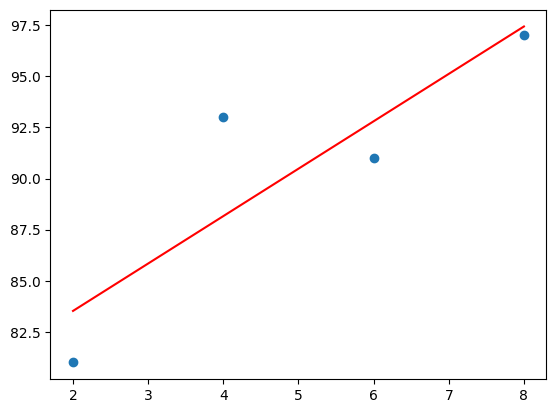

In [154]:
# 예측 결과 그래프
plt.scatter(x, y)
plt.plot(x, model.predict(x), 'r')
plt.show()

In [157]:
# 임의의 시간을 집어넣어 점수를 예측하는 모델 테스트
hour = np.array([7])
prediction = model.predict([hour])
print('%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다.' % (hour, prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다.


### 텐서플로에서 실행하는 다중 선형 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
x = np.array([[2,0], [4,4], [6,2], [8,3]])
y = np.array([81, 93, 91, 97])

In [3]:
model = Sequential()

model.add(Dense(1, input_dim=2, activation='linear'))

model.compile(optimizer='sgd', loss='mse')

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.fit(x,y, epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 9118.3799
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1498.2090
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 956.8557
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 913.3884
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 904.9716
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 899.0537
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 893.3454
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 887.6853
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 882.0620
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 876.4742
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 870.9220
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 865.4049
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 859.9229
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 854.4756
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [8]:
# 임의의 학습 시간, 과외 시간 집어넣어 점수를 예측하는 모델 테스트
import numpy as np

# 임의의 학습 시간과 과외 시간을 설정합니다.
hour = 7
private_class = 4

# 입력 데이터를 2D 배열 형태로 변환합니다.
input_data = np.array([[hour, private_class]])

# 모델을 사용하여 예측을 수행합니다.
prediction = model.predict(input_data)

# 예측 결과를 출력합니다.
print('%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다.' % (hour, private_class, prediction[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다.


# 6장 로지스틱 회귀 모델: 참 거짓 판단하기

### 1. 로지스틱 회귀의 정의
- 직선이 아니라 참(1)과 거짓(0) 사이를 구분하는 S자 형태의 선을 그어 주는 작업

### 2. 시그모이드 함수
- 여기서도 결국 ax +b
- a는 경사도 b는 그래프의 좌우 이동

### 3. 오차 공식
- 여기서는 평균 제곱 오차 사용 못함
- 시그모이드 함수 특징은 y 값이 0과 1사이 -> 이를 공식으로 사용 하는 함수 -> 로그 함수

### 4. 로그 함수
- 실제 값이 1일 떄 -> 예측 값이 1일때 오차가 0이고 반대로 예측 값이 0에 가까울수록 오차는 커짐
- 실제 값이 0일 때 -> 예측 값이 0일때 오차가 없고 1에 가까워질수록 오차가 매우 커짐
- 교차 엔트로피 오차(cross entropy error)
- 선형 회귀: 평균 제곱 오차, 로지스틱 회귀: 교차 엔트로피 오차

### 5. 텐서플로에서 실행하는 로지스틱 회귀 모델

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
x = np.array([2,4,6,8,10,12,14])
y = np.array([0,0,0,1,1,1,1])

In [12]:
model = Sequential()

model.add(Dense(1, input_dim=1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy')

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.fit(x, y, epochs=5000)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 8.5236
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.1280
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.7329
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.3383
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.9442
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.5509
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.1584
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7670
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.3767
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.9880
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.6012
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.2168
Epoch 13/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 3.8355
Epoch 14/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 3.4583
Epoch 15/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3.0865
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


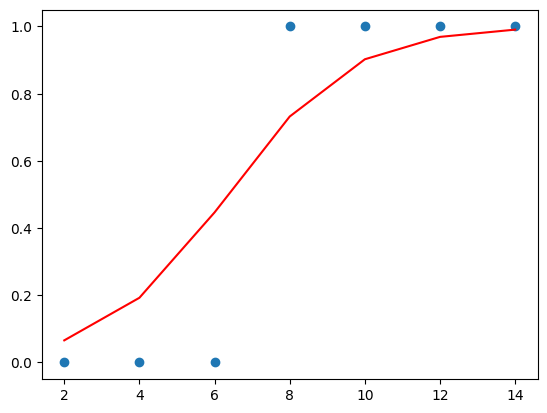

In [15]:
# 그래프로 확인
plt.scatter(x,y)
plt.plot(x, model.predict(x), 'r')
plt.show()

In [23]:
# 임의의 학습 시간을 집어 넣어 합격 예상 확률 예측
hour = np.array([7])
prediction = model.predict([hour])
print('%.f시간을 공부할 경우 합격 예상 확률은 %.01f%%입니다.' % (hour, prediction*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7시간을 공부할 경우 합격 예상 확률은 59.8%입니다.
